<a href="https://colab.research.google.com/github/Anshuldogra001/Grip_Internship/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prediction using Supervised ML

So let's start.......

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline

##Importing warning
we imported warning here so that it can ignore any kind of warnings during filter.

In [2]:
import warnings
warnings.filterwarnings('ignore')

##importing CSV file
now let's import or read the csv.
we can read csv in two way,

*Firstly, Download the csv file from the url and then using pandas to read csv.

*second method can be copy the url of the data present online and then using read_csv to read the csv file using pandas.

In [3]:
# importing data
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
s_data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


##Let's plot the distribution of score
Using plot to plot a x-y plane and then providing the table x-axis =Hours and y-axis=Scores and then label and give the title to the x-y plane. 

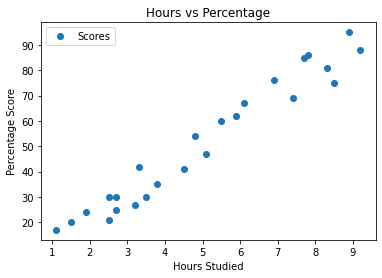

In [4]:
# Plotting the distribution of scores
s_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

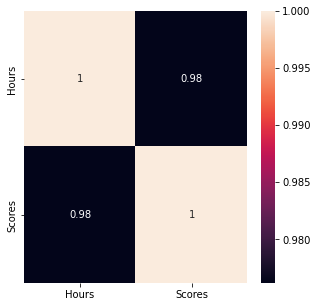

In [5]:
#correlation plot
plt.figure(figsize=(5,5))
correlation_matrix = s_data.corr()
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

##model Training
Let's train the model.....

In [6]:
X = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values  

In [7]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 


In [8]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


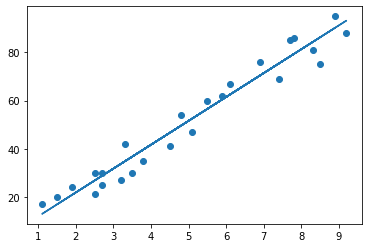

In [9]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

##Let's test some data before actual prediction..... 

In [10]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [11]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


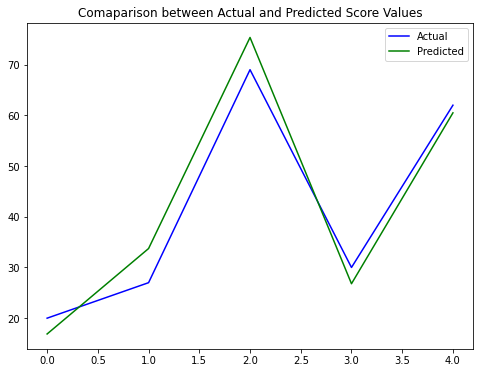

In [12]:
df.plot(kind='line',figsize=(8,6), color=["B", "G"], title= "Comaparison between Actual and Predicted Score Values")

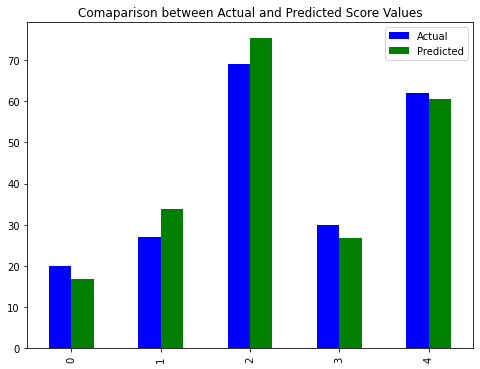

In [13]:
df.plot(kind='bar',figsize=(8,6), color=["B", "G"], title= "Comaparison between Actual and Predicted Score Values")

##Let's test the prediction we need to predict.

In [14]:
# Testing on our required data
hours = 9.25
my_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(my_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


In [15]:
# Importing metrics from sklearn 
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

# To find Mean Absolute Error(mse)
mse = (mean_absolute_error(y_test, y_pred))
print("MAE:",mse)

# To find Root Mean Squared Error(rmse)
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
print("RMSE:",rmse)

# To find coefficient of determination
r2 =  r2_score(y_test, y_pred)
print("R-Square:",r2)

MAE: 4.183859899002982
RMSE: 4.647447612100373
R-Square: 0.9454906892105354


##Let's make it a run time model

In [16]:
User_input = float(input())
print('Hours: {}'.format(User_input))
print('Predicted Score{}'.format(regressor.predict([[User_input]])))

3.65
Hours: 3.65
Predicted Score[38.1920562]
